# Data Exploration and Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("donors_data.csv")
df.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


# Column Renaming

In [2]:
df.columns = ["Index", "ID Numer", "Region1", "Region2", "Region3", "Region4", "Is a Homeowner", "Number of Children",
              "Household Income", "Gender", "Wealth Rating", "Average Home Value", "Median Family Income",
              "Average Family Income", "Percentage Low Income", "Number of Promotions", "All Gifts", "Largest Gift",
              "Most Recent Gift", "Num Months Last Donations", "Num Months betwn 1st and 2nd Gift", "Avg. Gift",
              "Donor", "Donated Money"]

In [3]:
df.head()

,Index,ID Numer,Region1,Region2,Region3,Region4,Is a Homeowner,Number of Children,Household Income,Gender,...,Percentage Low Income,Number of Promotions,All Gifts,Largest Gift,Most Recent Gift,Num Months Last Donations,Num Months betwn 1st and 2nd Gift,Avg. Gift,Donor,Donated Money
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


# Analysis (Visualizing) 

## Average family income of donors

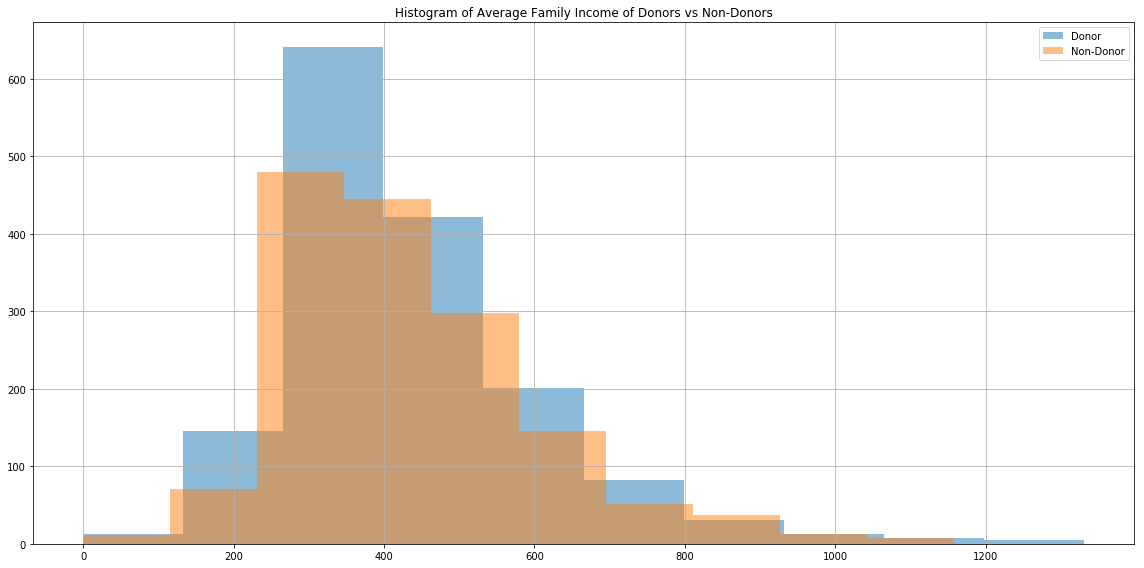

In [4]:
fig = plt.figure(figsize=(16, 8))
df[df["Donor"] == 1]["Average Family Income"].hist(alpha=0.5, label="Donor")
df[df["Donor"] == 0]["Average Family Income"].hist(alpha=0.5, label="Non-Donor")
plt.legend()
plt.title("Histogram of Average Family Income of Donors vs Non-Donors")
plt.tight_layout();

In [5]:
income_donor = df[df["Donor"] == 1]["Average Family Income"].mean()
income_non_donor = df[df["Donor"] == 0]["Average Family Income"].mean()
print("Mean Average Family Income for Donor: \t  ", income_donor)
print("Mean Average Family Income for Non-Donor: ", income_non_donor)

Mean Average Family Income for Donor: 	   432.48974358974357
Mean Average Family Income for Non-Donor:  431.6865384615385


## Question 1 (q1.csv)
- Unit of Analysis: __Average Family Income__
- Comparison: For each type donor, and non-donor, we have what is the mean amount of family income. 
- Analysis: Since the income of donors is higher than that of non-donors, it states that rich people are more likely to donate
- Output: Row 1 is for donors, and 2 is for non donors. Each value indicates the mean average family income

In [6]:
# write to output file
with open("q1.csv", "w") as f:
    f.write("Average income\n")
    f.write(str(income_donor) + "\n")
    f.write(str(income_non_donor) + "\n")

## Total Zonal Donations

[4194.37, 3172.0, 4314.5, 8597.92]


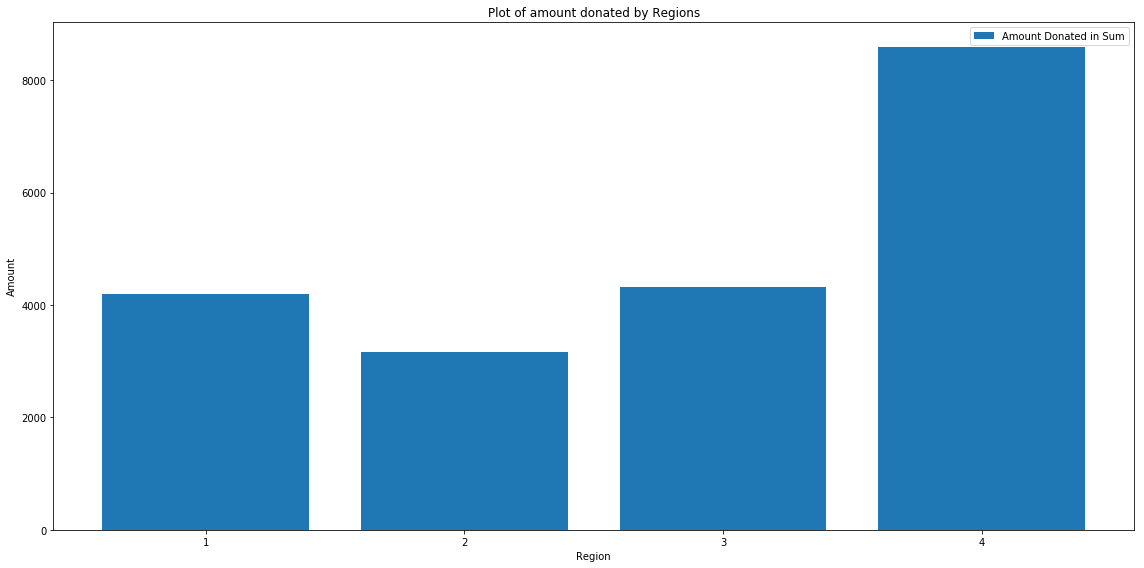

In [11]:
fig = plt.figure(figsize=(16, 8))
amount_donated = [df[df["Region1"] == 1]["Donated Money"].sum(),
                    df[df["Region2"] == 1]["Donated Money"].sum(),
                    df[df["Region3"] == 1]["Donated Money"].sum(),
                    df[df["Region4"] == 1]["Donated Money"].sum()]

print(amount_donated)
plt.bar(['1', '2', '3', '4'], amount_donated, label="Amount Donated in Sum")
plt.legend()
plt.title("Plot of amount donated by Regions")
plt.xlabel("Region")
plt.ylabel("Amount")
plt.tight_layout();

## Question 2 (q2.csv)
- Unit of Analysis: __Amount Donated__
- Comparison: For each type region, 1, 2, 3, and 4, we have what is the sum amount of money donated. 
- Analysis: We observe that region 2 donates least money and region 4 donates maximum. 
- Output: Rows are for regions, each row is one region and corresponding sum of amount donated. 

In [ ]:
with open("q2.csv", "w") as f:
    f.write("Region, Sum of Money Donated\n")
    for zone, money in enumerate(amount_donated):
        f.write("{}, {}\n".format(zone, money))